C:\Users\ab161\AppData\Local\Temp\ipykernel_1700\103580417.py:58: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



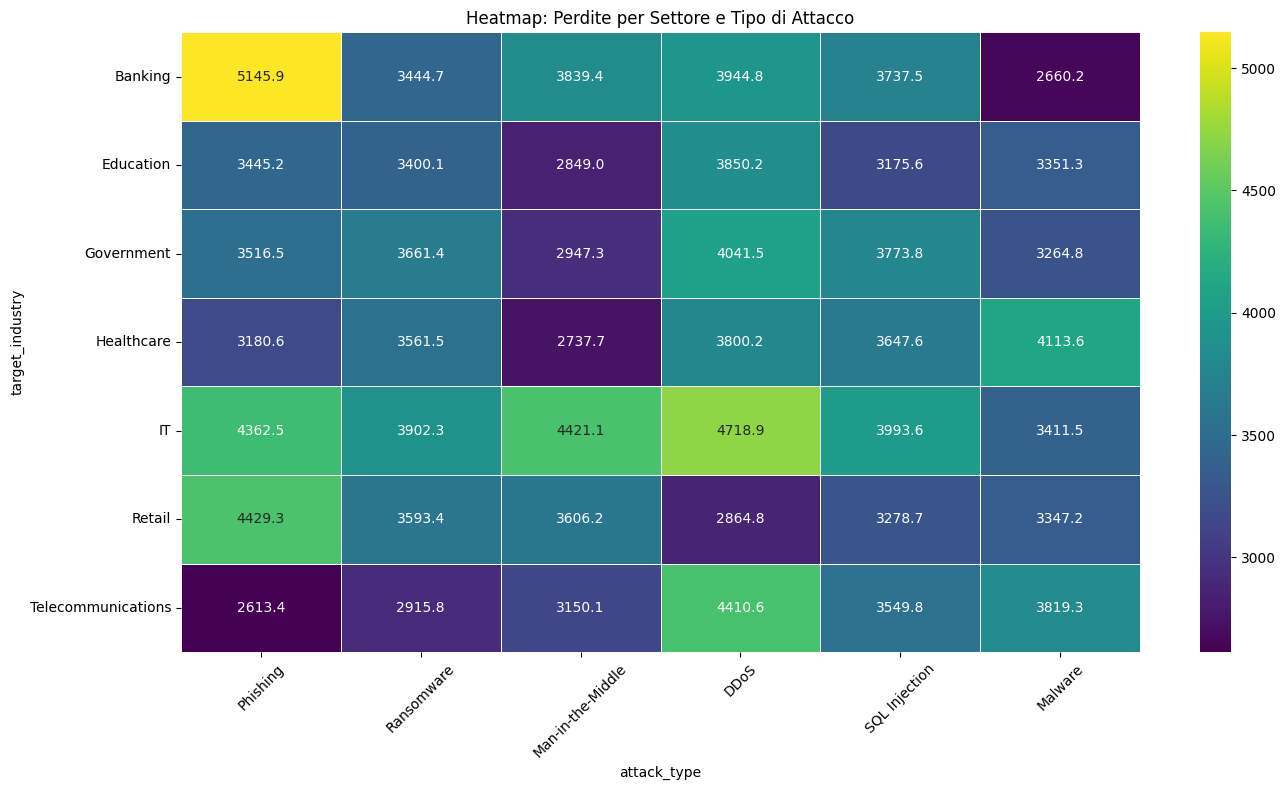

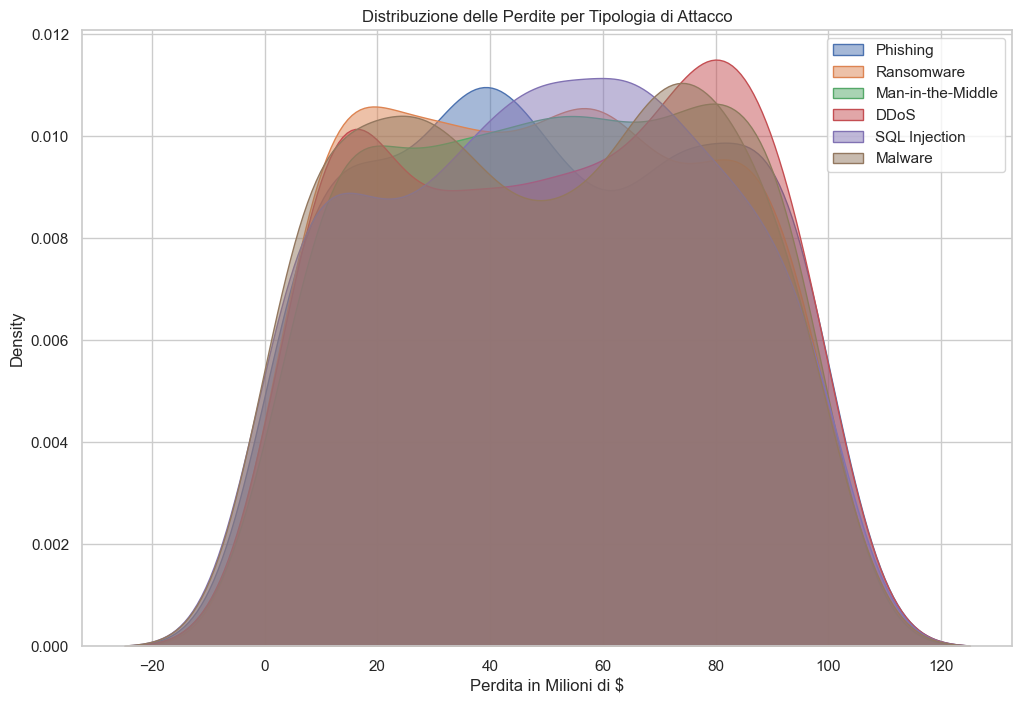

C:\Users\ab161\AppData\Local\Temp\ipykernel_1700\103580417.py:104: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\ab161\AppData\Local\Temp\ipykernel_1700\103580417.py:112: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [1]:
# advanced_cyber_plots.ipynb - Visualizzazioni Scientifiche Complesse

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import numpy as np

# Imposta tema scuro per plotly
pio.templates.default = "plotly_dark"

# Carica dataset Cyber Threats
df = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# === 1. GRAFICI MULTIDIMENSIONALI ===

# 1.1 Scatter Plot 3D: perdita vs utenti vs tempo
fig_3d = px.scatter_3d(df, 
    x='incident_resolution_time_(in_hours)', 
    y='financial_loss_(in_million_$)', 
    z='number_of_affected_users',
    color='attack_type', 
    symbol='attack_source',
    hover_name='target_industry',
    title='Relazione tra Perdita, Tempo e Utenti colpiti')
fig_3d.show()

# 1.2 Parallel Coordinates: analisi multivariata
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=df['attack_type'].unique(), ordered=True)
df['attack_type'] = df['attack_type'].astype(cat_type)
par_df = df[['financial_loss_(in_million_$)', 'incident_resolution_time_(in_hours)',
             'number_of_affected_users', 'attack_type']].dropna().copy()
fig_par = px.parallel_coordinates(par_df,
    dimensions=['financial_loss_(in_million_$)', 'incident_resolution_time_(in_hours)', 'number_of_affected_users'],
    color=par_df['attack_type'].cat.codes,
    labels={'financial_loss_(in_million_$)': 'Loss ($M)',
            'incident_resolution_time_(in_hours)': 'Resolution Time (h)',
            'number_of_affected_users': 'Users Affected'},
    title='Coordinated Parallel Plot per Incidente')
fig_par.show()

# 1.3 Bubble Matrix: impatto per settore
sector_df = df.groupby('target_industry')[['financial_loss_(in_million_$)', 'number_of_affected_users']].sum().reset_index()
fig_bubble = px.scatter(sector_df, x='financial_loss_(in_million_$)', y='number_of_affected_users',
                        size='financial_loss_(in_million_$)', color='target_industry',
                        hover_name='target_industry',
                        title='Settori colpiti: Utenti vs Perdite')
fig_bubble.show()


# === 2. DISTRIBUZIONI & CONFRONTI ===

# 2.1 Heatmap: tipo di attacco vs settore
pivot = df.pivot_table(index='target_industry', columns='attack_type', 
                       values='financial_loss_(in_million_$)', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap="viridis", linewidths=0.5, annot=True, fmt=".1f")
plt.title("Heatmap: Perdite per Settore e Tipo di Attacco")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2.2 Ridgeline Plot: perdita per tipo (richiede seaborn + disegno multiplo)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
for i, attack in enumerate(df['attack_type'].unique()):
    subset = df[df['attack_type'] == attack]
    sns.kdeplot(subset['financial_loss_(in_million_$)'], fill=True, label=attack, alpha=0.5)
plt.title("Distribuzione delle Perdite per Tipologia di Attacco")
plt.xlabel("Perdita in Milioni di $")
plt.legend()
plt.show()

# 2.3 Barplot illustrato: Top 10 incidenti per perdita
bar_df = df.sort_values('financial_loss_(in_million_$)', ascending=False).head(10)
fig_bar = px.bar(bar_df, 
    x='financial_loss_(in_million_$)', 
    y='target_industry',
    color='attack_type', 
    orientation='h',
    hover_data=['attack_source', 'number_of_affected_users'],
    title='Top 10 Attacchi per Perdite Economiche')
fig_bar.update_layout(yaxis={'categoryorder':'total ascending'})
fig_bar.show()


# === 3. GRAFICI NARRATIVI / TEMPORALI ===

# 3.1 Lineplot combinato: attacchi + risposte
count_per_year = df.groupby('year').size()
defense_per_year = df.groupby('year')['defense_mechanism_used'].nunique()
fig_line = go.Figure()
fig_line.add_trace(go.Scatter(x=count_per_year.index, y=count_per_year.values, mode='lines+markers', name='Attacchi'))
fig_line.add_trace(go.Bar(x=defense_per_year.index, y=defense_per_year.values, name='Difese diverse'))
fig_line.update_layout(title="Numero di Attacchi vs Diversità di Difese Usate per Anno",
                       xaxis_title='Anno', yaxis_title='Volume', barmode='overlay')
fig_line.show()

# 3.2 Animated Timeline: tipo attacco nel tempo
anim_df = df.groupby(['year', 'attack_type']).size().reset_index(name='count')
fig_anim = px.bar(anim_df, x='attack_type', y='count', color='attack_type',
                  animation_frame='year', range_y=[0, anim_df['count'].max()+20],
                  title='Evoluzione degli Attacchi Informatici nel Tempo')
fig_anim.update_layout(xaxis={'categoryorder':'total descending'})
fig_anim.show()

# 3.3 Treemap: settori più colpiti
agg_tree = df.groupby(['target_industry', 'attack_type'])['financial_loss_(in_million_$)'].sum().reset_index()
fig_tree = px.treemap(agg_tree, path=['target_industry', 'attack_type'], 
                      values='financial_loss_(in_million_$)',
                      title='Treemap delle Perdite per Settore e Tipo di Attacco')
fig_tree.show()


C:\Users\ab161\AppData\Local\Temp\ipykernel_2736\3918245278.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




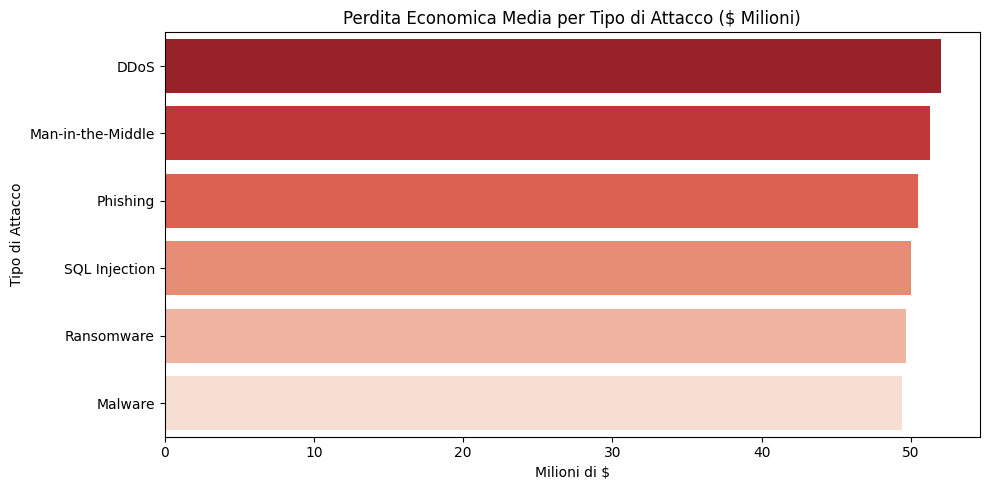

C:\Users\ab161\AppData\Local\Temp\ipykernel_2736\3918245278.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




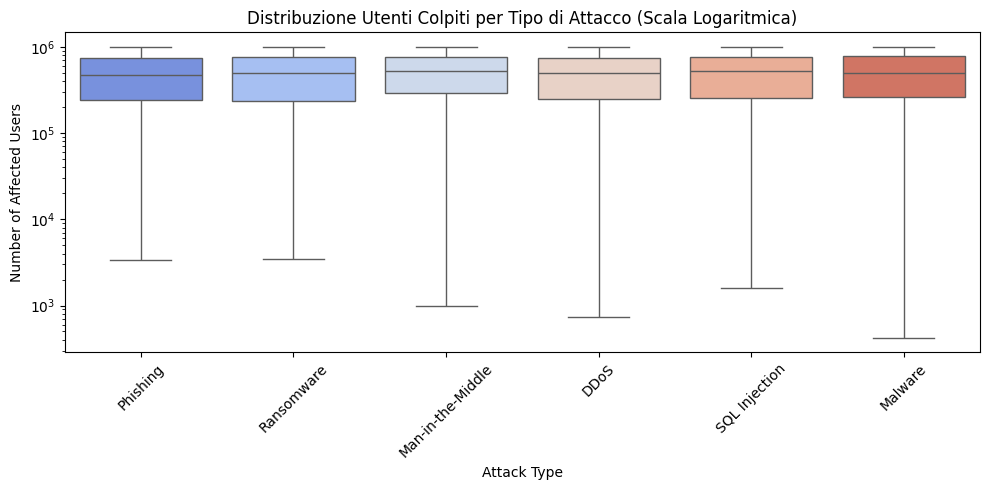

C:\Users\ab161\AppData\Local\Temp\ipykernel_2736\3918245278.py:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




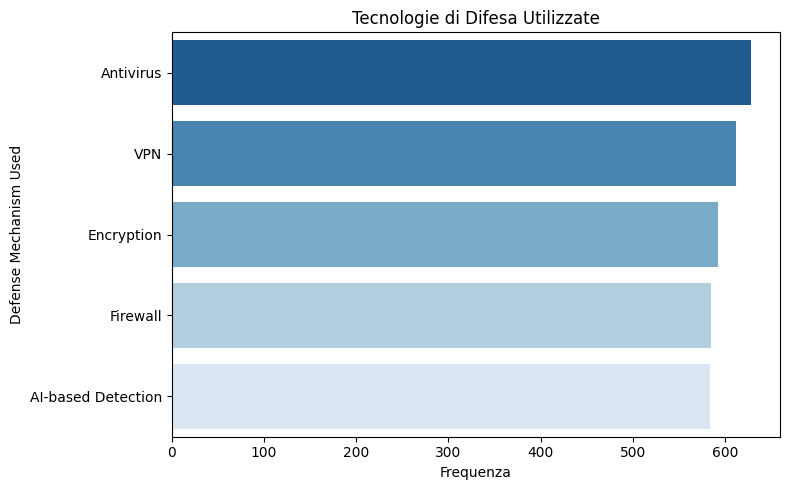

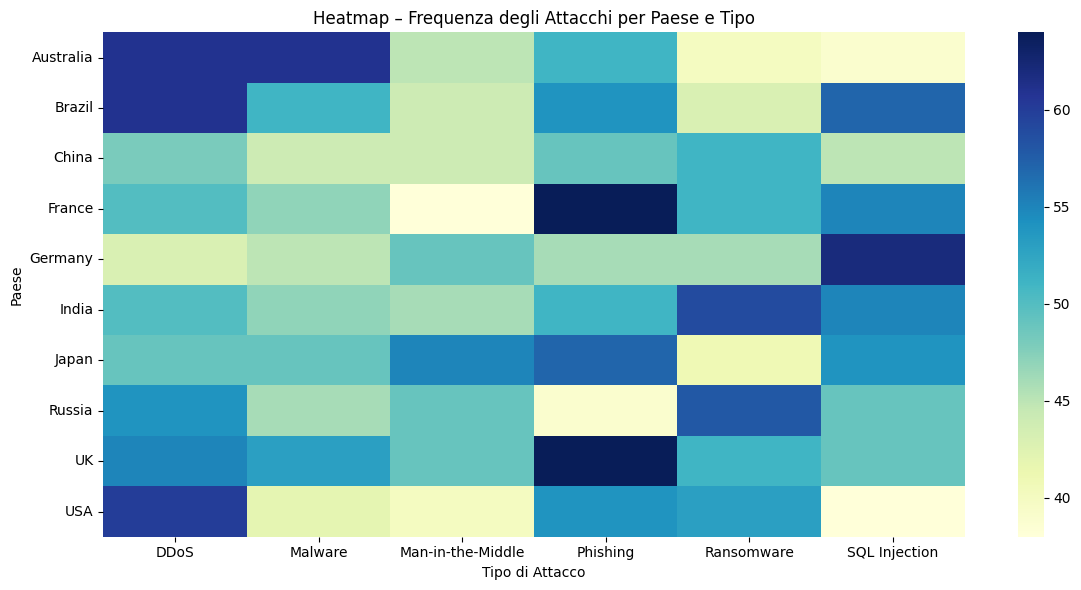

In [1]:
# 📊 Cybersecurity Threats – Analisi completa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Caricamento dati
df = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")

# Pulizia
df['Year'] = df['Year'].astype(int)
df['Financial Loss (in Million $)'] = pd.to_numeric(df['Financial Loss (in Million $)'], errors='coerce')
df['Number of Affected Users'] = pd.to_numeric(df['Number of Affected Users'], errors='coerce')

# === 1. Trend degli attacchi nel tempo ===
attacks_by_year = df.groupby(['Year', 'Attack Type']).size().reset_index(name='Count')
fig1 = px.line(attacks_by_year, x='Year', y='Count', color='Attack Type',
               title='Andamento delle Minacce Cyber per Tipo (2015–2024)')
fig1.show()

# === 2. Mappa geografica degli attacchi ===
country_count = df['Country'].value_counts().reset_index()
country_count.columns = ['Country', 'Count']
fig2 = px.choropleth(country_count, locations='Country', locationmode='country names',
                     color='Count', title='Distribuzione Geografica delle Cyber Threats')
fig2.show()

# === 3. Settori più colpiti ===
industry_count = df['Target Industry'].value_counts().head(10)
fig3 = px.bar(industry_count, x=industry_count.index, y=industry_count.values,
              labels={"x": "Settore", "y": "Numero di Attacchi"},
              title="Top 10 Settori Colpiti")
fig3.show()

# === 4. Perdita economica media per tipo di attacco ===
loss_by_type = df.groupby('Attack Type')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=loss_by_type.values, y=loss_by_type.index, palette="Reds_r")
plt.title("Perdita Economica Media per Tipo di Attacco ($ Milioni)")
plt.xlabel("Milioni di $")
plt.ylabel("Tipo di Attacco")
plt.tight_layout()
plt.show()

# === 5. Distribuzione utenti colpiti per attacco ===
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Attack Type', y='Number of Affected Users', palette="coolwarm")
plt.yscale('log')
plt.title("Distribuzione Utenti Colpiti per Tipo di Attacco (Scala Logaritmica)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === 6. Tecnologie di difesa più usate ===
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Defense Mechanism Used', order=df['Defense Mechanism Used'].value_counts().index, palette='Blues_r')
plt.title("Tecnologie di Difesa Utilizzate")
plt.xlabel("Frequenza")
plt.tight_layout()
plt.show()

# === 7. Fonte di attacco × vulnerabilità ===
source_vuln = df.groupby(['Attack Source', 'Security Vulnerability Type']).size().reset_index(name='Count')
fig4 = px.sunburst(source_vuln, path=['Attack Source', 'Security Vulnerability Type'], values='Count',
                   title='Origine Attacco e Vulnerabilità Sfruttata')
fig4.show()

# === 8. Tempo medio di risoluzione per attacco ===
avg_resolution = df.groupby('Attack Type')['Incident Resolution Time (in Hours)'].mean().sort_values()
fig5 = px.bar(avg_resolution, x=avg_resolution.index, y=avg_resolution.values,
              labels={"x": "Tipo di Attacco", "y": "Tempo Medio (ore)"},
              title="Tempo Medio di Risoluzione per Tipo di Attacco")
fig5.show()

# === 9. Heatmap Attacco × Paese ===
heat_df = df.groupby(['Country', 'Attack Type']).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(heat_df, cmap="YlGnBu", annot=False)
plt.title("Heatmap – Frequenza degli Attacchi per Paese e Tipo")
plt.xlabel("Tipo di Attacco")
plt.ylabel("Paese")
plt.tight_layout()
plt.show()


In [ ]:
# === 10. Correlazione tra perdita economica e numero di utenti colpiti ===
fig6 = px.scatter(df, x='Number of Affected Users', y='Financial Loss (in Million $)',
                  color='Attack Type', size='Incident Resolution Time (in Hours)',
                  title="Perdita vs Utenti Colpiti (dimensione = tempo di risoluzione)",
                  log_x=True, log_y=True)
fig6.show()

# === 11. Bubble chart: Attacco vs Paese con perdite medie ===
bubble = df.groupby(['Country', 'Attack Type']).agg({
    'Financial Loss (in Million $)': 'mean',
    'Number of Affected Users': 'mean'
}).reset_index()

fig7 = px.scatter(bubble, x='Country', y='Attack Type', size='Financial Loss (in Million $)',
                  color='Number of Affected Users', title="Perdite Economiche Medie per Attacco e Paese",
                  size_max=60)
fig7.show()

# === 12. Treemap: Distribuzione Attacchi per Paese e Settore ===
fig8 = px.treemap(df, path=['Country', 'Target Industry'], title="Treemap - Distribuzione Attacchi per Paese e Settore")
fig8.show()

# === 13. Istogramma logaritmico: Risoluzione degli incidenti ===
plt.figure(figsize=(10,5))
sns.histplot(df['Incident Resolution Time (in Hours)'], bins=40, kde=True, color='purple', log_scale=True)
plt.title("Distribuzione Logaritmica del Tempo di Risoluzione")
plt.xlabel("Tempo (ore)")
plt.tight_layout()
plt.show()

# === 14. Boxplot: Confronto tempo risoluzione per fonte di attacco ===
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Attack Source', y='Incident Resolution Time (in Hours)', palette='Set2')
plt.title("Tempo di Risoluzione per Fonte di Attacco")
plt.tight_layout()
plt.show()

# === 15. Countplot: Tipo di vulnerabilità più comune per ogni difesa usata ===
cross_df = df.groupby(['Defense Mechanism Used', 'Security Vulnerability Type']).size().reset_index(name='Count')
fig9 = px.bar(cross_df, x='Defense Mechanism Used', y='Count', color='Security Vulnerability Type',
              title="Vulnerabilità affrontate da ciascuna difesa", barmode='stack')
fig9.show()

# === 16. Pairplot (matrice di relazioni quantitative) ===
sns.pairplot(df[['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']],
             kind="scatter", diag_kind="kde", corner=True)
plt.suptitle("Relazioni tra Variabili Quantitative", y=1.02)
plt.show()


KeyError: 'Breach Size'